# <center> Projet IMA201 - Segmentation de lésions cutanées

# <div style="text-align: right">Réalisé  par : Eya Ghamgui - Siwar Mhadhbi </div> 

## Description du Projet  


Lors de ce projet, on va implémenter un algorithme de segmentation qui est basé sur l'analyse de l'espace colorimétrique et la méthode de seuillage d'histogramme basée sur le clustering. Cette méthode ce décompose en différente parties : 

<font color='red'>**1.**<font color ='black'> Transformation des espaces couleurs. 

<font color='red'>**2.**<font color ='black'> Filtrage du bruit à l'aide du filtre passe bas "pillbox". 
    
<font color='red'>**3.**<font color ='black'> Ajustement d'intensité de l'image. 
    
<font color='red'>**4.**<font color ='black'> Seuillage d'histogramme basé sur le clustering : méthode d'Otsu. 
    
<font color='red'>**5.**<font color ='black'> Étiquetage des composantes connectées. 
    
<font color='red'>**6.**<font color ='black'> Remplissage à l'aide de l'opérateur Morphologique. 

On va performer une deuxième méthode d'étiquetage des composantes connectées et la comparer avec la première.
<br>
Ensuite, on va évaluer l'algorithme de segmentation et comparer les différentes valeurs des indices de performance afin de trouver le canal de couleur le plus efficace pour cette application.
<br>
Finalement, on présentera trois types de résultats : mauvais, moyen et bon. 

## Importations

In [1]:
import os
import time
import psutil
import pandas as pd
from skimage import io as skio
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from Filelist import * 
from Metrics import *
from Main import *
from Canal import *

import warnings
warnings.filterwarnings("ignore")

## Exemple des résultats sur le canal Bleu

### Exemple 1 : 

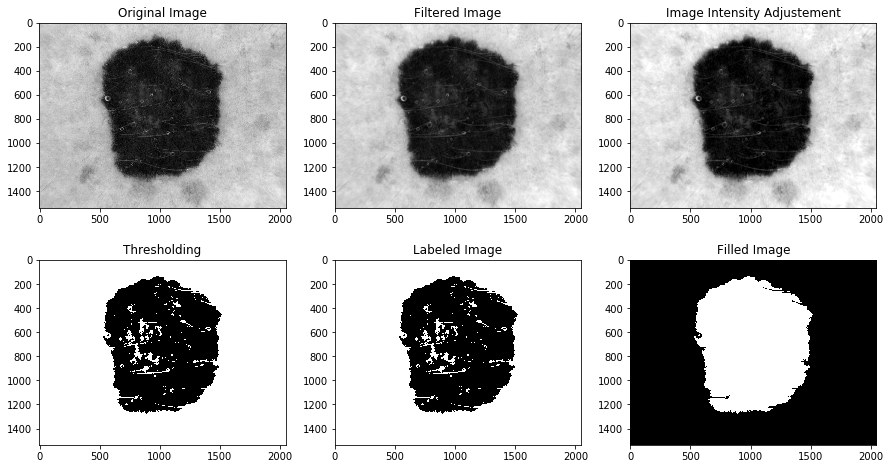

In [4]:
# Le canal bleu 
c = 'B'

# L'image initiale 
im = skio.imread('images\\melanoma\\ISIC_0000145.jpg')

# Nouvelle image après le choix du canal 
im1 = Canal(im,c)

# Appliquer la méthode de segmentation 
L= Main(im1)

# Affichage des résultats
fig, axs = plt.subplots(2, 3,figsize=(15,8))
axs[0][0].imshow(im1,cmap='gray');
axs[0][0].set_title('Original Image');
axs[0][1].imshow(L[0],cmap='gray');
axs[0][1].set_title('Filtered Image');
axs[0][2].imshow(L[1],cmap='gray');
axs[0][2].set_title('Image Intensity Adjustement');
axs[1][0].imshow(L[2],cmap='gray');
axs[1][0].set_title('Thresholding');
axs[1][1].imshow(L[3],cmap='gray');
axs[1][1].set_title('Labeled Image');
axs[1][2].imshow(L[4],cmap='gray');
axs[1][2].set_title('Filled Image');

### Exemple 2 :

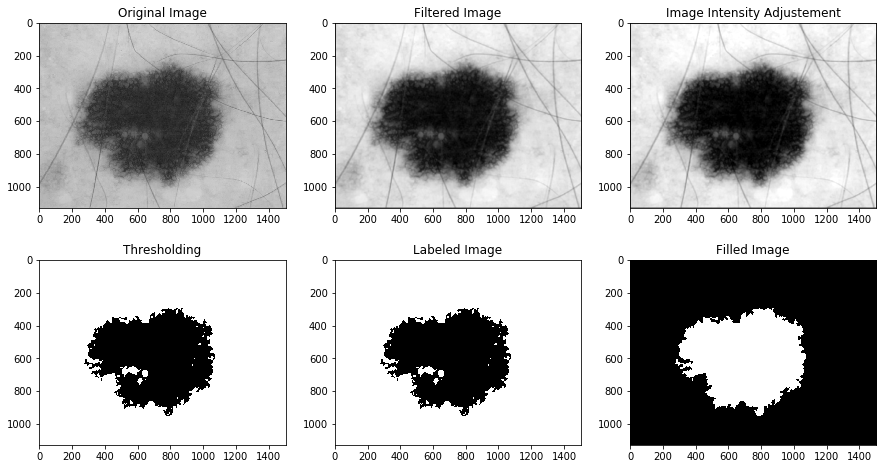

In [5]:
# L'image initiale 
im = skio.imread('images\\nevus\\ISIC_0000019.jpg')

# Nouvelle image après le choix du canal 
im1 = Canal(im,c)

# Appliquer la méthode de segmentation 
L= Main(im1)

# Affichage des résultats
fig, axs = plt.subplots(2, 3,figsize=(15,8))
axs[0][0].imshow(im1,cmap='gray');
axs[0][0].set_title('Original Image');
axs[0][1].imshow(L[0],cmap='gray');
axs[0][1].set_title('Filtered Image');
axs[0][2].imshow(L[1],cmap='gray');
axs[0][2].set_title('Image Intensity Adjustement');
axs[1][0].imshow(L[2],cmap='gray');
axs[1][0].set_title('Thresholding');
axs[1][1].imshow(L[3],cmap='gray');
axs[1][1].set_title('Labeled Image');
axs[1][2].imshow(L[4],cmap='gray');
axs[1][2].set_title('Filled Image');

## Calcul des indices de performances 

In [2]:
path =  'images\\'
folders = os.listdir(path)
columns = ['Name','Canal','Dice','Hausdorff Distance','Jaccard Index','Adjusted Rand Index','Volumetric Similarity','Normalized Mutual Information']
performances = pd.DataFrame(columns=columns)

# Parcourir les deux fichiers
for i in folders:
    
    path1 = path+i+'\\'
    images = Filelist(path1,'.jpg')
    masques = Filelist(path1,'.png')
    
    # Parcourir toutes les images
    for j in range(len(images)):
        
        im_original = skio.imread(path1+images[j]) #[:,:,2]
        gt = skio.imread(path1+masques[j])
        
        # Parcourir tous les canaux
        for c in ['R','G','B','H','S','I','X','Y','Z']:
            
            im=Canal(im_original,c)
            result = Main(im)
            L=[images[j],c,Dice(result[-1],gt/255), Hausdorff_Distance(result[-1],gt/255), Jaccard_Index(result[-1],gt/255), Ad_Rand_Index(result[-1],gt/255), Volumetric_Similarity(result[-1],gt/255), Mutual_Normalized(result[-1],gt/255)]
            performances=performances.append(pd.Series(L,index=columns),ignore_index=True)

In [3]:
performances.to_csv('tableau_de_performances.csv')
performances = performances.set_index(['Name','Canal'])

In [11]:
performances.head(18)

Dice  Hausdorff Distance  Jaccard Index  \
Name             Canal                                                
ISIC_0000030.jpg R      0.663890           20.199010       0.496882   
                 G      0.310941           22.538855       0.184091   
                 B      0.302600           23.579652       0.178273   
                 H      0.000000            1.414214       0.000000   
                 S      0.000000            1.414214       0.000000   
                 I      0.268088           28.670542       0.154793   
                 X      0.434390           22.649503       0.277457   
                 Y      0.456498           22.516660       0.295754   
                 Z      0.427825           22.583180       0.272123   
ISIC_0000046.jpg R      0.546956           20.688161       0.376421   
                 G      0.546956           20.688161       0.376421   
                 B      0.546956           20.688161       0.376421   
                 H      0.000000            1.414214       0.000000   
                 S      0.000000            1.414214       0.000000   
                 I      0.032369           30.364453       0.016451   
                 X      0.681793           18.330303       0.517213   
                 Y      0.684871           17.175564       0.520763   
                 Z      0.738381           22.715633       0.585264   

                        Adjusted Rand Index  Volumetric Similarity  \
Name             Canal                                               
ISIC_0000030.jpg R             0.000000e+00               0.663890   
                 G             2.666755e-03               0.555677   
                 B             1.687318e-03               0.554243   
                 H            -2.921258e-08               0.000005   
                 S            -2.921258e-08               0.000005   
                 I             4.426981e-02               0.798183   
                 X             1.935168e-02               0.694131   
                 Y             2.643076e-02               0.710022   
                 Z             1.790700e-02               0.687044   
ISIC_0000046.jpg R             0.000000e+00               0.546956   
                 G             0.000000e+00               0.546956   
                 B             0.000000e+00               0.546956   
                 H            -9.336837e-07               0.000006   
                 S            -9.336837e-07               0.000006   
                 I             6.289916e-01               0.812469   
                 X             3.804193e-01               0.715340   
                 Y             3.850103e-01               0.715464   
                 Z             4.568850e-01               0.757005   

                        Normalized Mutual Information  
Name             Canal                                 
ISIC_0000030.jpg R                       2.562813e-15  
                 G                       3.151400e-03  
                 B                       1.923977e-03  
                 H                       2.336127e-06  
                 S                       2.336127e-06  
                 I                       3.902931e-02  
                 X                       1.893355e-02  
                 Y                       2.536063e-02  
                 Z                       1.770744e-02  
ISIC_0000046.jpg R                      -5.364329e-15  
                 G                      -5.364329e-15  
                 B                      -5.364329e-15  
                 H                       1.679817e-06  
                 S                       1.679817e-06  
                 I                       5.488580e-01  
                 X                       3.447784e-01  
                 Y                       3.512318e-01  
                 Z                       4.197592e-01

## Affichage des indices de performance

In [4]:
L=[]
L.append(pd.DataFrame(performances['Dice'].groupby('Canal').agg(['mean','std']).round(3).T)) 
L.append(pd.DataFrame(performances['Hausdorff Distance'].groupby('Canal').agg(['mean','std']).round(3).T))
L.append(pd.DataFrame(performances['Jaccard Index'].groupby('Canal').agg(['mean','std']).round(3).T))
L.append(pd.DataFrame(performances['Adjusted Rand Index'].groupby('Canal').agg(['mean','std']).round(3).T))
L.append(pd.DataFrame(performances['Volumetric Similarity'].groupby('Canal').agg(['mean','std']).round(3).T))
L.append(pd.DataFrame(performances['Normalized Mutual Information'].groupby('Canal').agg(['mean','std']).round(3).T))

### Les moyennes des indices de performance :

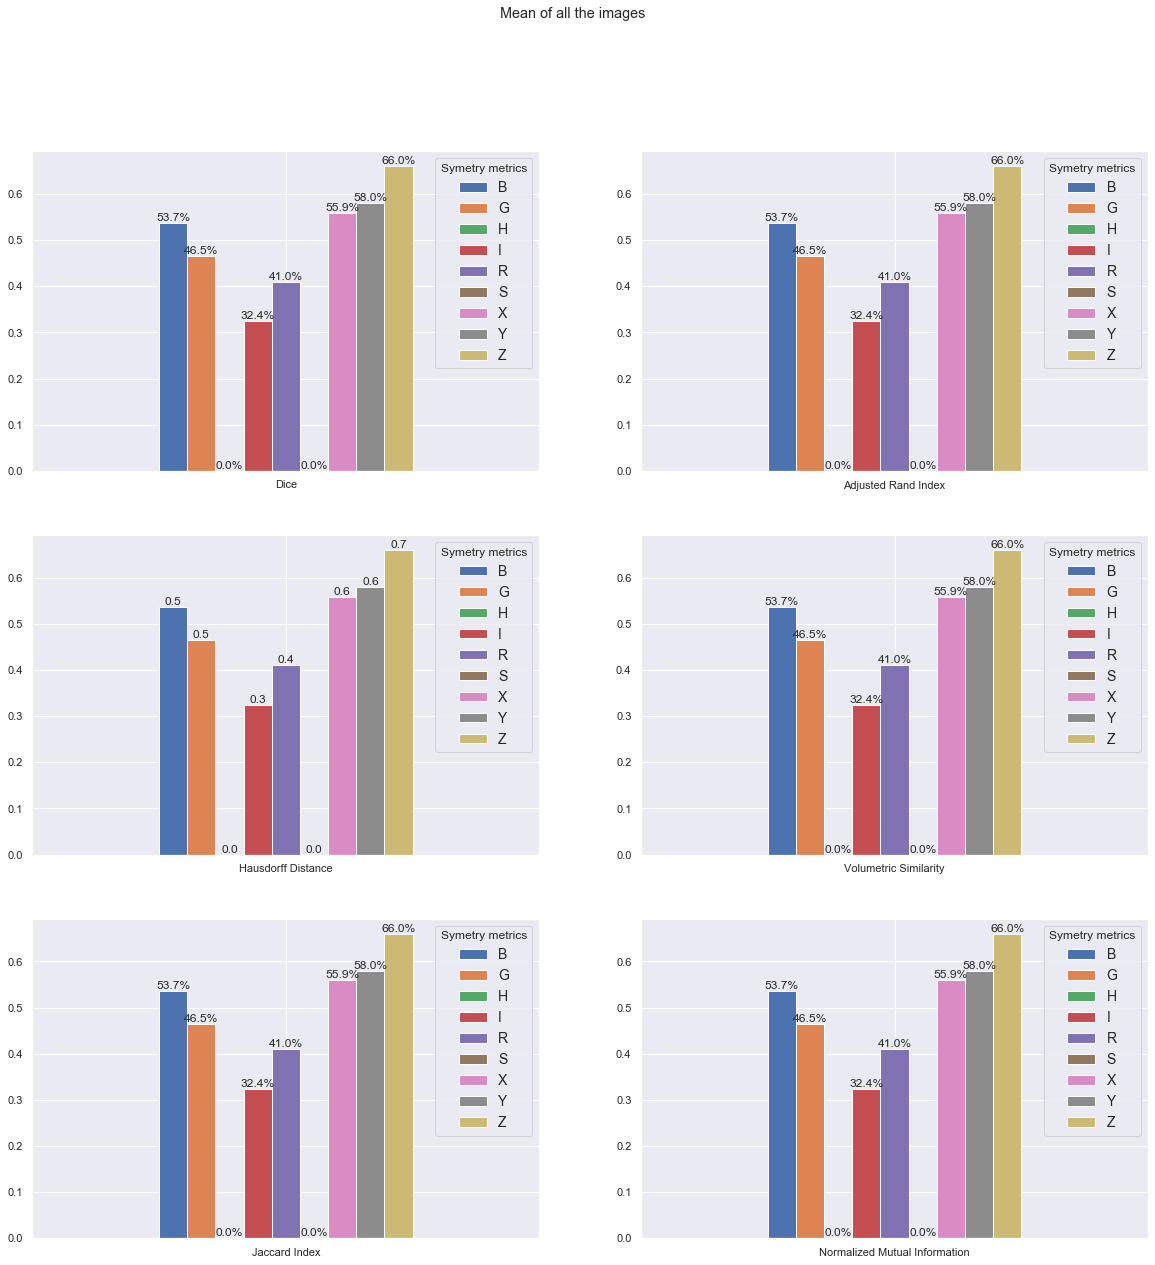

In [50]:
fig, axs = plt.subplots(3, 2,figsize=(20,20))
k=0
Ind = ['Dice', 'Hausdorff Distance' , 'Jaccard Index' , 'Adjusted Rand Index' , 'Volumetric Similarity' ,'Normalized Mutual Information'  ]
fig.suptitle('Mean of all the images')
for j in range (2): 
    for i in range (3):
        D= pd.DataFrame(L[0].loc['mean']).rename(columns={'mean' : Ind[k]}).T
        D.plot.bar(rot=0, ax =axs[i][j]) 
        axs[i][j].legend(title='Symetry metrics',fontsize= 14, fancybox=True)
        for p in axs[i][j].patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            if k == 1 :
                axs[i][j].annotate('{:.1f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
            else :
                axs[i][j].annotate('{:.1f}%'.format(y*100), (x.mean(), y),ha='center', va='bottom')  
        k+=1
plt.show()

### Les écarts types des indices de performance :

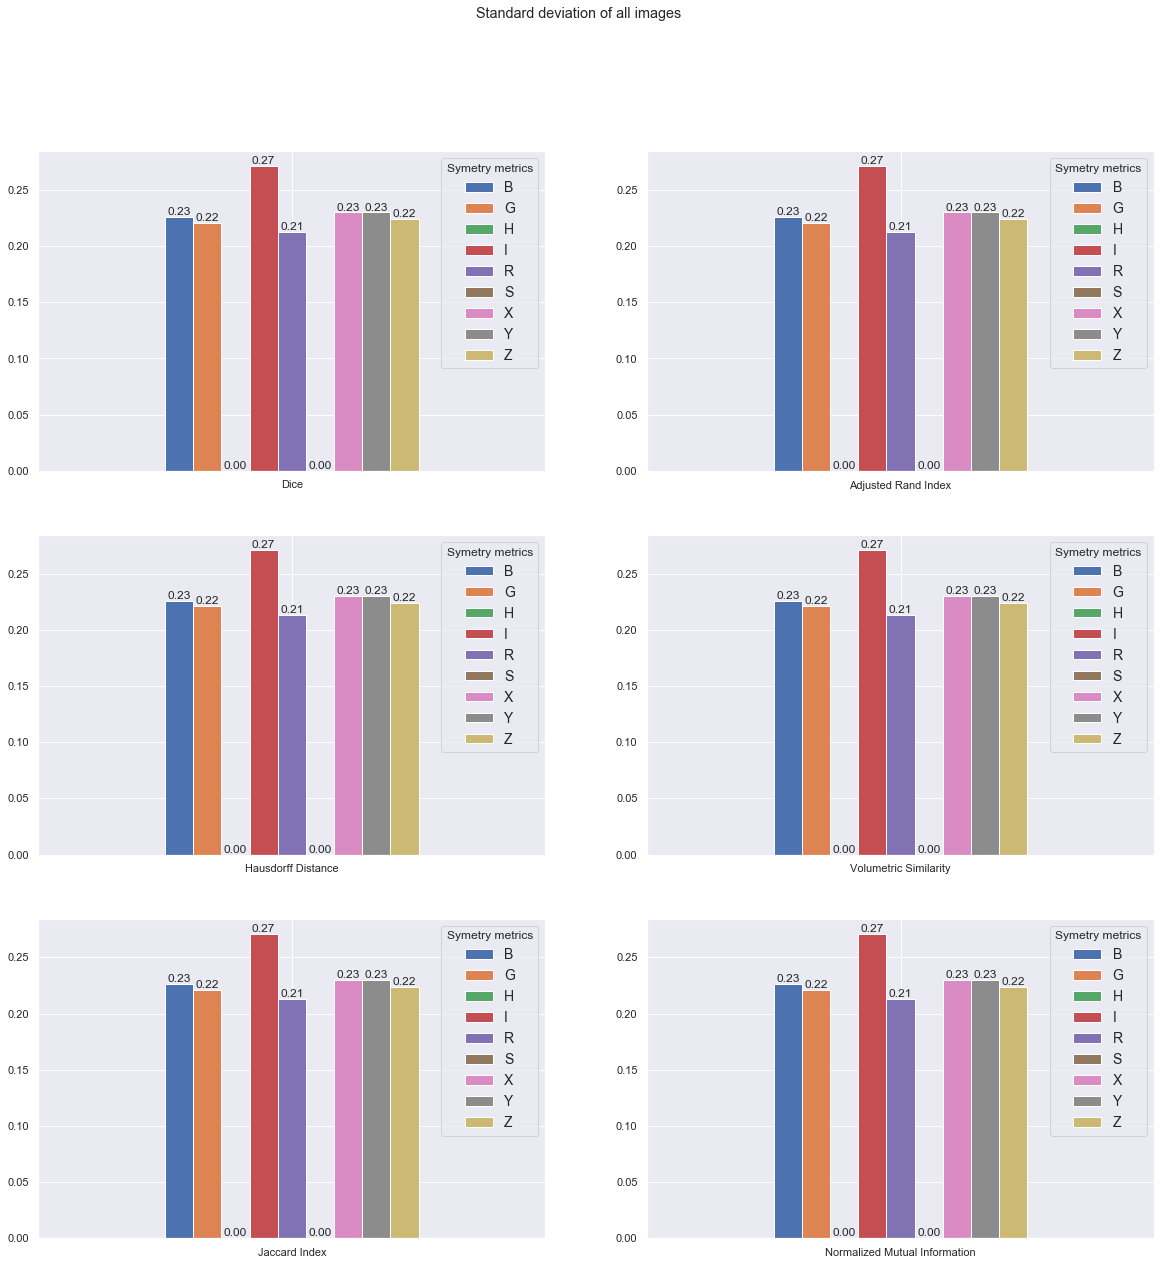

In [8]:
fig, axs = plt.subplots(3, 2,figsize=(20,20))
k=0
Ind = ['Dice', 'Hausdorff Distance' , 'Jaccard Index' , 'Adjusted Rand Index' , 'Volumetric Similarity' ,'Normalized Mutual Information'  ]
fig.suptitle('Standard deviation of all images')
for j in range (2): 
    for i in range (3):
        D= pd.DataFrame(L[0].loc['std']).rename(columns={'std' : Ind[k]}).T
        D.plot.bar(rot=0, ax =axs[i][j]) 
        axs[i][j].legend(title='Symetry metrics',fontsize= 14, fancybox=True)
        for p in axs[i][j].patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            axs[i][j].annotate('{:.2f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
        k+=1
plt.show()

### <font color ='red'> Commentaires :

- À partir des figures précédentes, on remarque que l'espace colorimétrique XYZ a fourni les meilleurs résultats de segmentation sur presque toutes les images de notre base de données. De plus, on constate que le canal Z est le plus performant parmi les canaux de cet espace avec un Dice moyen égal à 0,66.


- Concernant les canaux de l'espace colorimétrique RGB, on remarque qu'ils sont moins performants que les canaux de l'espace XYZ mais plus performants que ceux de l'espace colorimétrique HSI. De plus, on peut noter que le canal bleu est le plus performant parmi ces trois canaux RGB et le canal rouge est celui avec les mauvais indices de performance. 


-  Les canaux de l'espace HSI sont les moins performants pour presque tous les indices comparés avec les autres canaux.


- A partir des résultats des écart-types des indices de performance (cf. figure 8.3), on remarque que ces variations sont proches pour tous les canaux à l’exception des canaux H et S de l’espace HSI. De plus, le canal I représente une plus grande variation ; ce qui signifie que les variations des erreurs de segmentation sont plus grandes dans ce canal.


<font color ='red'> $ \Longrightarrow $ <font color ='black'> On peut alors conclure que l'espace HSI n'est pas adapté à notre application de segmentation. Cependant, l'espace XYZ est le meilleur pour cette segmentation, plus précisément le canal Z.

## Application des deux méthodes de l'étiquetage des composantes connectées

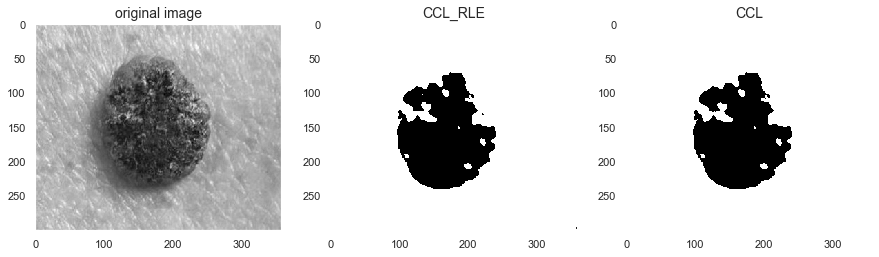

Temps methode 1 :  0.41126
Temps methode 2 :  6.90002
%Mémoire utilisé par la méthode 1 : 0.1 %
%Mémoire utilisé par la méthode 2 : 0.2 %


In [2]:
import psutil
# Le canal bleu 
c = 'B'

# L'image initiale 
im = skio.imread('im1.jpg')

# Nouvelle image après le choix du canal 
im1 = Canal(im,c)

# Appliquer la méthode de segmentation et calcul du temps et de mémoire utilisée sur la première méthode 
 
init_mem = psutil.virtual_memory().percent
start_time = time.time()

L = Main(im1)

 
end_time = time.time()
end_mem = psutil.virtual_memory().percent

# Appliquer la méthode de segmentation et calcul du temps et de mémoire utilisée sur la deuxième méthode 

init_mem1 = psutil.virtual_memory().percent
start_time1 = time.time() 

L1 = Main(im1, labeling2 = True)

end_time1 = time.time()
end_mem1= psutil.virtual_memory().percent

# Affichage des deux images 
plt.rcParams['axes.grid'] = False
fig, axs = plt.subplots(1, 3,figsize=(15,8))
axs[0].imshow(im1, cmap ='gray')
axs[0].set_title('original image',fontsize=14)
axs[1].imshow(L[3], cmap ='gray')
axs[1].set_title('CCL_RLE',fontsize=14)
axs[2].imshow(L1[3], cmap ='gray')
axs[2].set_title('CCL', fontsize=14)
plt.show()

# Affichage du temps de calcul et de la mémoire utilisée par chacune des deux méthodes
print('Temps methode 1 : ', round(end_time - start_time,5))
print('Temps methode 2 : ', round(end_time1 - start_time1,5))
print('%Mémoire utilisé par la méthode 1 :' , round(end_mem - init_mem , 5) , '%')
print('%Mémoire utilisé par la méthode 2 :' , round(end_mem1 - init_mem1 , 5) , '%')

### <font color ='red'> Commentaires :

- En termes de temps de calcul, la première méthode a pris 0.41126 secondes pour une image choisie. Par contre, la deuxième méthode a pris 6.90002 secondes pour la même image. 


- En termes de mémoire, le pourcentage de mémoire utilisée par la première méthode est égal à 0.1 % et le pourcentage de mémoire utilisée par la deuxième méthode est égale à 0.2 %. 


- On note que la première méthode présente un temps de calcul 14 fois moins et un pourcentage de mémoire utilisée 2 fois moins que ceux de la deuxième méthode. Cette différence va causer un problème lors de l’application de cette méthode sur une série d’images de tailles plus grandes. 

<font color ='red'> $ \Longrightarrow $ <font color ='black'> Pour cela, on va choisir la première méthode qui est basée sur la méthode du Run Length Encoding. 

## Comparaison entre trois résultats visuelles 

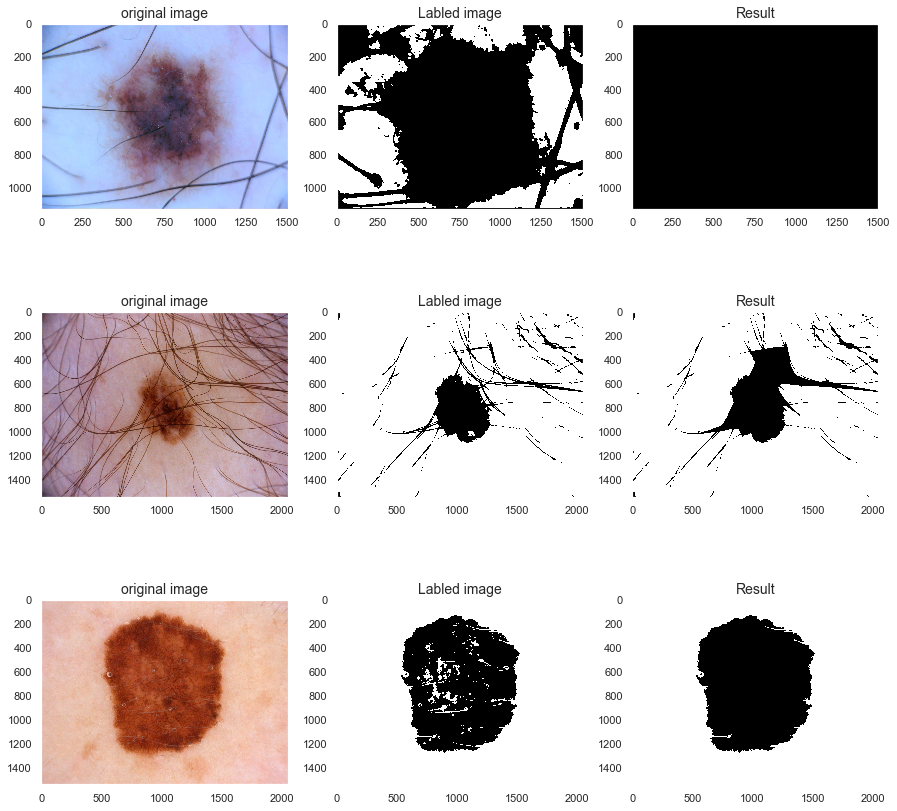

In [25]:
im_w = skio.imread('images\\nevus\\ISIC_0000042.jpg')
im_m = skio.imread('images\\nevus\\ISIC_0000095.jpg')
im_b = skio.imread('images\\melanoma\\ISIC_0000145.jpg')

im_w1 = Canal(im_w,'B')
im_m1 = Canal(im_m,'B')
im_b1 = Canal(im_b,'B')

L1 = Main(im_w1)
L2 = Main(im_m1)
L3 = Main(im_b1)

# Affichage des trois images 
plt.rcParams['axes.grid'] = False
fig, axs = plt.subplots(3, 3 , figsize=(15,15))
axs[0][0].imshow(im_w, cmap ='gray')
axs[0][0].set_title('original image',fontsize=14)
axs[0][2].imshow(1- L1[-1], cmap ='gray')
axs[0][2].set_title('Result',fontsize=14)
axs[0][1].imshow(L1[-2], cmap ='gray')
axs[0][1].set_title('Labled image',fontsize=14)
axs[1][0].imshow(im_m, cmap ='gray')
axs[1][0].set_title('original image',fontsize=14)
axs[1][1].imshow(L2[-2], cmap ='gray')
axs[1][1].set_title('Labled image',fontsize=14)
axs[1][2].imshow(1- L2[-1], cmap ='gray')
axs[1][2].set_title('Result',fontsize=14)
axs[2][0].imshow(im_b, cmap ='gray')
axs[2][0].set_title('original image',fontsize=14)
axs[2][1].imshow(L3[-2], cmap ='gray')
axs[2][1].set_title('Labled image',fontsize=14)
axs[2][2].imshow(1- L3[-1], cmap ='gray')
axs[2][2].set_title('Result',fontsize=14)

plt.show()

### <font color ='red'> Commentaires :

- Les trois premières figures nous montrent le résultat de cette méthode sur une image contenant des poils intenses. La méthode d’Otsu a détecté plusieurs détails indésirables, elle a considéré les poils et la lésion comme un unique objet. De la sorte, le fond apparaît comme des trous dans l’image qui ont été bouchés par l’opérateur morphologique résultant en une image toute noire. Ainsi, les images avec des poils sont les limites de cette méthode. Afin d’éliminer ces défauts, on peut avoir recourt à des méthodes d’enlèvement de poils comme celle du DullRazor.


- Les trois figures suivantes nous montrent le résultat de cette méthode sur une image contenant des poils moins intenses. Après la méthode du seuillage d’Otsu, la lésion a été bien détectée mais avec d’autres composants. A la suite de la phase de remplissage morphologique, non seulement le trou dans la lésion a été bouché mais aussi une nouvelle partie du complémentaire de la région d’intérêt apparaît comme partie de la lésion. Certes, l’intensité des objets autres que la lésion a un impact important sur la qualité de la détection de la région d’intérêt, plus intenses qu’ils soient plus la détection sera mauvaise.


- Les trois derniers figures correspondent à une détection parfaite de la lésion cutanée. La qualité originale de l’image a joué un rôle important dans cette détection : l’image initiale présente seulement la lésion sans aucuns autres objets.